In [77]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from k_nearest_neighbors import KNNClassifier
from decision_tree import DecisionTree
import matplotlib.pyplot as plt


In [78]:
train_df = pd.read_csv("./dataset/train.csv")
val_df = pd.read_csv("./dataset/val.csv")

num_train_entries = len(train_df)
print(f"Number of train entries: {num_train_entries}")
num_val_entries = len(val_df)
print(f"Number of val entries: {num_val_entries}")


Number of train entries: 3275
Number of val entries: 819


In [79]:
train_df.head()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,103,17,17,1.0,0.0,1.0,0,0.0,0.0,1,3,0,31.592,8,0,38.85,38.85,FRAUD
1,647,19,19,0.0,0.0,0.0,0,0.0,0.0,1,3,1,44.184,19,0,12.95,12.95,FRAUD
2,689,14,14,0.0,0.0,0.0,1,0.0,0.0,1,3,0,35.608,18,0,12.95,12.95,FRAUD
3,104,19,19,0.0,0.0,0.0,1,1.0,1.0,1,3,0,44.040,17,3,38.85,38.85,LEGIT
4,166,12,12,0.0,0.0,1.0,0,1.0,0.0,1,2,0,-35.896,8,0,12.95,12.95,FRAUD


In [80]:
train_df["TRN_TYPE"] = train_df["TRN_TYPE"].replace(0, np.nan)
val_df["TRN_TYPE"] = val_df["TRN_TYPE"].replace(0, np.nan)

train_df = train_df.dropna(subset=["TRN_TYPE"])
val_df = val_df.dropna(subset=["TRN_TYPE"])

le = preprocessing.LabelEncoder()
combined_labels = pd.concat([train_df["TRN_TYPE"], val_df["TRN_TYPE"]])
le.fit(combined_labels)

train_df['TRN_TYPE'] = le.transform(train_df["TRN_TYPE"])
val_df['TRN_TYPE'] = le.transform(val_df["TRN_TYPE"])

print(f"List of unique elements: {le.classes_}")

train_df.head()

List of unique elements: ['FRAUD' 'LEGIT']


,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,103,17,17,1.0,0.0,1.0,0,0.0,0.0,1,3,0,31.592,8,0,38.85,38.85,0
1,647,19,19,0.0,0.0,0.0,0,0.0,0.0,1,3,1,44.184,19,0,12.95,12.95,0
2,689,14,14,0.0,0.0,0.0,1,0.0,0.0,1,3,0,35.608,18,0,12.95,12.95,0
3,104,19,19,0.0,0.0,0.0,1,1.0,1.0,1,3,0,44.040,17,3,38.85,38.85,1
4,166,12,12,0.0,0.0,1.0,0,1.0,0.0,1,2,0,-35.896,8,0,12.95,12.95,0


In [81]:
train_df = train_df.fillna(0)
val_df = val_df.fillna(0)

label_column = "TRN_TYPE"
X_train = train_df.loc[:, train_df.columns != label_column]
y_train = train_df[label_column]

X_val = val_df.loc[:, val_df.columns != label_column]
y_val = val_df[label_column]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_val = X_val.to_numpy()
y_val = y_val.to_numpy()

In [82]:
def plot_accuracies(train_accuracies, val_accuracies, param_name, param_values):
    plt.plot(param_values, train_accuracies, label="Train Accuracy", marker='o')
    plt.plot(param_values, val_accuracies, label="Validation Accuracy", marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f"Train vs Validation Accuracy ({param_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

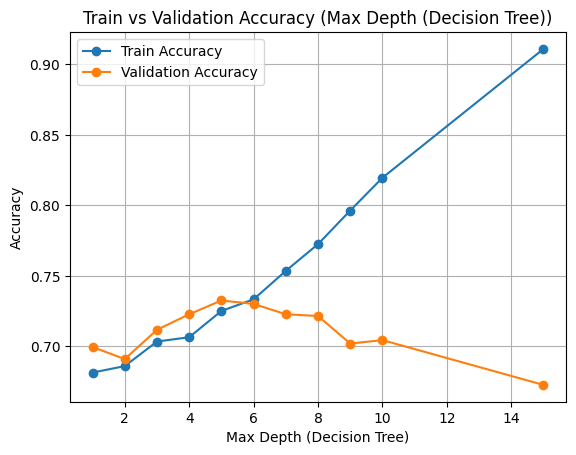

In [83]:
train_accuracies_tree = []
val_accuracies_tree = []
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]

for depth in depth_values:
    tree = DecisionTree(max_depth=depth, mode="ig")
    tree.fit(X_train, y_train)
    
    y_train_pred_tree = tree.predict(X_train)
    train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
    
    y_val_pred_tree = tree.predict(X_val)
    val_accuracy_tree = accuracy_score(y_val, y_val_pred_tree)

    train_accuracies_tree.append(train_accuracy_tree)
    val_accuracies_tree.append(val_accuracy_tree)

plot_accuracies(train_accuracies_tree, val_accuracies_tree, "Max Depth (Decision Tree)", depth_values)

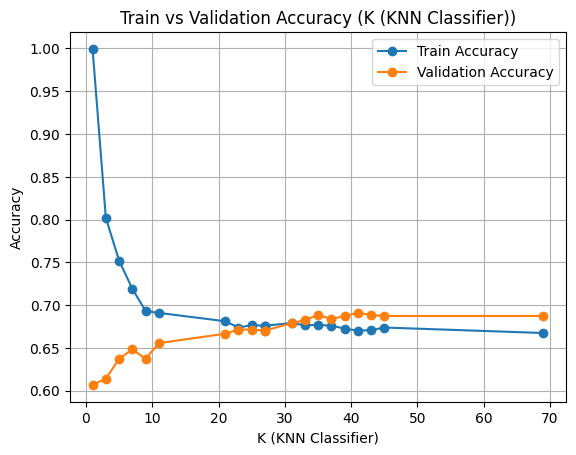

In [84]:
train_accuracies_knn = []
val_accuracies_knn = []
k_values = [1, 3, 5, 7, 9, 11, 21, 23, 25, 27, 27, 31, 33, 35, 37, 39, 41, 43, 45, 69]

for k in k_values:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
 
    y_train_pred_knn = knn.predict(X_train)
    train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
    
    y_val_pred_knn = knn.predict(X_val)
    val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)

    train_accuracies_knn.append(train_accuracy_knn)
    val_accuracies_knn.append(val_accuracy_knn)

plot_accuracies(train_accuracies_knn, val_accuracies_knn, "K (KNN Classifier)", k_values)

##### Concept:

**Underfitting** happens when a model is too simple, resulting in poor performance on both training and validation data. As shown in the plots, low depth for Decision Tree or high K for KNN

**Overfitting** occurs when a model is too complex, achieving high training accuracy but poor validation accuracy. As shown in the plots, high depth for Decision Tree or very low K for KNN.

##### Form the results:

**Decision Tree**: Overfitting starts after max_depth=6. Balanced model around max_depth=4-6.

**KNN**: Overfitting at k=1. Balanced model around k=10-20.
These balanced regions show where the models generalize best without memorizing the training data.